# Multiple Linear Regression
- Kali ini Ucup mencoba untuk membantu temenya yaitu Joko untuk memprediksi harga rumah untuknya.
- Joko senduri tinggal di US tepatnya di King County dan sekarang sedang mencari rumah karena dia baru saja menikaj.
- Data diambil dari kaggle dengan sedikit modifikasi.
- Joko sendiri ingin membeli rumah dengan jumlah kamar tidur itu 3, jumlah kamar mandinya itu 2, luas rumahnya itu 1800sqft, grade rumahnya 7 dan tahun pembangunanya pada tahun 1990.
- Yuk bantu Ucup membangun model machine learning untuk membantu joko!

- Langkah Pengerjaan hampir sama dengan yang Simple Linear Regression hanya saja Multivariate Linear Regression memiliki lebih > 1 independent variable (x)

### Load library

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Load datasets

In [31]:
#Nama dataframe kita adalah df yang berisi data dari kc_house_data.csv.
#Features yang digunakan adalah 'bedrooms','bathrooms','sqft_living','grade','price' dan 'yr_built'
df = pd.read_csv('kc_house_data.csv', usecols=['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'price', 'yr_built'])

### Sneak peak data

In [32]:
#Melihat 5 baris teratas dari data
#Independent variabel(x) adalah bedrooms, bathrooms, sqft_living, grade, yr_built
#Dependent variabel(y) adalah price
df.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1.00,1180,7,1955
1,538000.0,3,2.25,2570,7,1951
2,180000.0,2,1.00,770,6,1933
3,604000.0,4,3.00,1960,7,1965
4,510000.0,3,2.00,1680,8,1987


- Penjelasan setiap kolom:
    1. bedrooms = Jumlah kamar tidur
    2. bathrooms = Jumlah kamar mandi
    3. sqft_living = Luas rumah dalam satuan sqft
    4. grade = Grading system dari pemerintah King County US
    5. yr_built = Tahun dimana rumah dibangun
    6. price = Harga dari rumah (US$)

In [33]:
#Mengetahui jumlah kolom dan baris dari data
#Data kita mempunya 6 kolom (features) dengan 21613 baris
df.shape

(21613, 6)

In [34]:
#Melihat informasi data kita mulai dari jumlah data, tipe data, memory yang digunakan dll.
#Dapat dilihat bahwa seluruh data sudah di dalam bentuk numerik
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
price          21613 non-null float64
bedrooms       21613 non-null int64
bathrooms      21613 non-null float64
sqft_living    21613 non-null int64
grade          21613 non-null int64
yr_built       21613 non-null int64
dtypes: float64(2), int64(4)
memory usage: 1013.2 KB


In [35]:
#Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll
df.describe()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,7.656873,1971.005136
std,3.671272e+05,0.930062,0.770163,918.440897,1.175459,29.373411
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,1900.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,13.000000,2015.000000


- Pada feature bathrooms terdapat nilai pecahan, aneh kan yak kalo ada nilai jumlah kamar mandi pecahan gitu. Maka kita ubah dulu jenis data yang semula float menjadi int.
- Pada feature bedrooms terdapat nilai 33, ini sangat aneh karena masak rumah ada yang punya kamar 33 apalagi ini rumah pribadi. jadi kemungkinan itu typo dan akan saya ganti menjadi 3

In [36]:
#Mrubah tipe data dari bathrooms yang semula float menjadi int
df['bathrooms'] = df['bathrooms'].astype('int')

In [37]:
#Mengganti nilai 33 menjadi 3
df['bedrooms'] = df['bedrooms'].replace(33,3)

### Handling Missing Values

In [38]:
#Mencari dan menangani missing values
#Ternyata data kita tidak ada missing values
df.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
grade          0
yr_built       0
dtype: int64

### Exploratory Data Analysis (EDA)

In [39]:
df.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1,1180,7,1955
1,538000.0,3,2,2570,7,1951
2,180000.0,2,1,770,6,1933
3,604000.0,4,3,1960,7,1965
4,510000.0,3,2,1680,8,1987


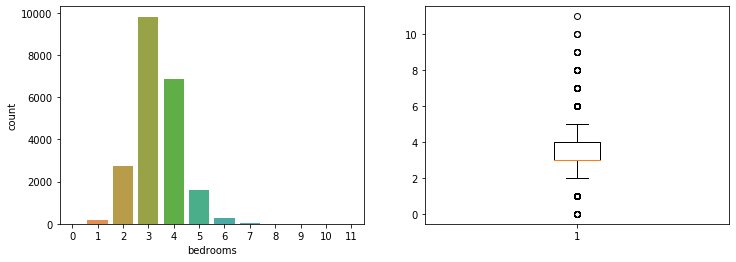

In [40]:
#Univariate analysis bedrooms
#Melihat distribusi dari bedrooms
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['bedrooms'])

f.add_subplot(1,2,2)
plt.boxplot(df['bedrooms'])
plt.show()

- Dapat dilihat bahwa sebagian besar jumlah kamar tidur itu di angka 3 dan 4.
- Data memiliki banyak outliers.

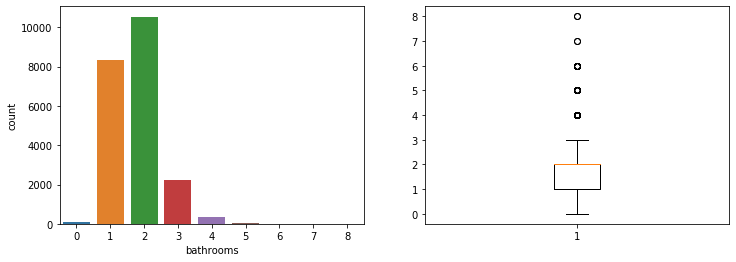

In [41]:
#Univariate analysis bathrooms
#Melihat distribusi dari bathrooms
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['bathrooms'])

f.add_subplot(1,2,2)
plt.boxplot(df['bathrooms'])
plt.show()

- Jumlah kamar mandi paling banyak berada pada angka 1 dan 2.
- Yang menarik disini adalah dimana ada rumah yang tidak ada kamar mandinya atau jumlahnya 0
- Nilai outlier sendiri lumayan banyak.

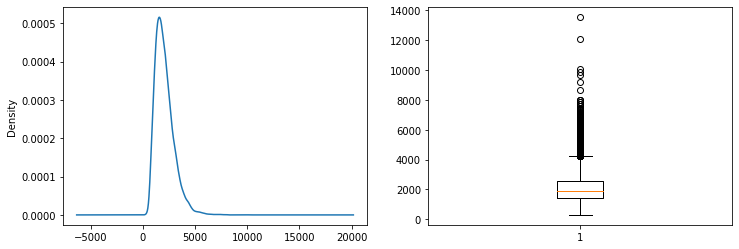

In [42]:
#Univariate analysis sqft_living
#Melihat distribusi dari sqft_living
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['sqft_living'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['sqft_living'])
plt.show()

- Density dari distribusi luas rumah berada di sekitar angka 2000an.
- Banyak terdapat outliers.

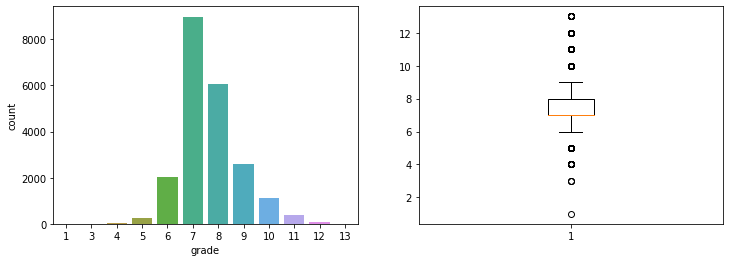

In [43]:
#Univariate analysis grade
#Melihat distribusi dari grade
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['grade'])

f.add_subplot(1,2,2)
plt.boxplot(df['grade'])
plt.show()

- Sebagian besar rumah di County King US memiliki grade 7 dan 8.
- Dilihat dari boxplot, data memiliki beberapa outliers.

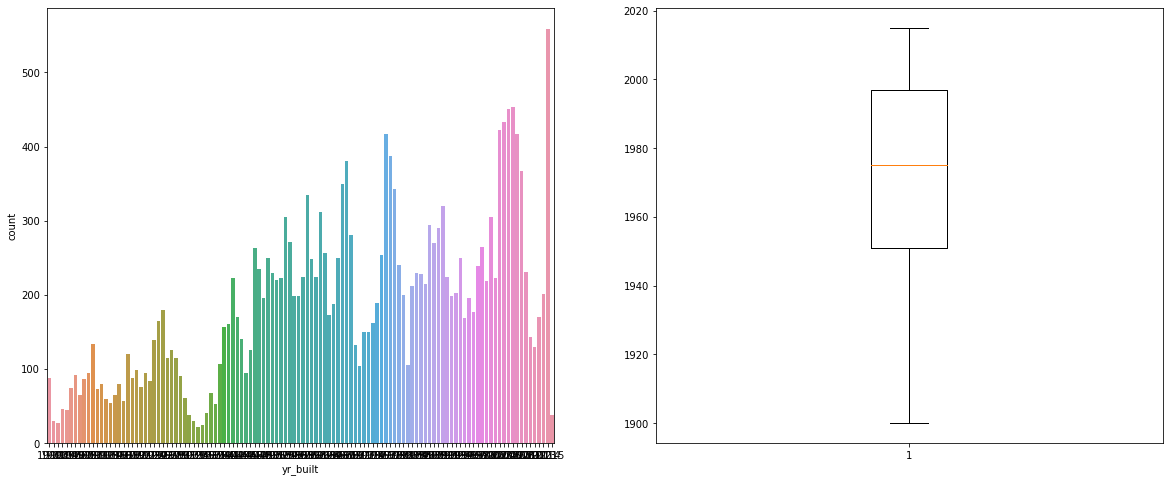

In [44]:
#Univariate analysis yr_built
#Melihat distribusi dari yr_built
f = plt.figure(figsize=(20,8))

f.add_subplot(1,2,1)
sns.countplot(df['yr_built'])

f.add_subplot(1,2,2)
plt.boxplot(df['yr_built'])
plt.show()

- Dapat dilihat bahwa semakin tua umur dari rumah, maka semakin sedikit orang yang menjual rumahnya tersebut.
- Density terdapat di sekitar tahun 1980an.
- Data tidak memiliki outliers.

F:\Anaconda\envs\pandas\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

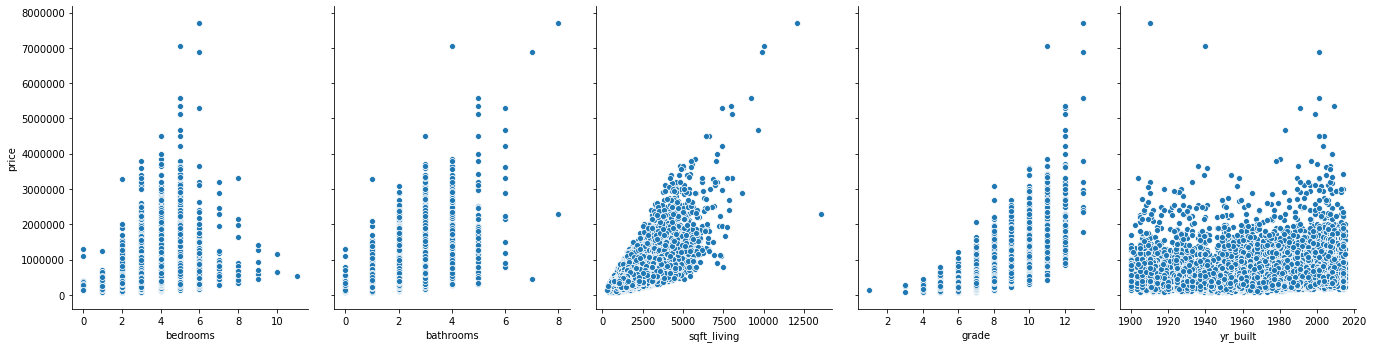

In [45]:
#Bivariate analysis antara independent variable dan dependent variable
#Melihat hubungan antara independent dan dependent
#Menggunakan pairplot
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'yr_built'], y_vars=['price'], size=5, aspect=0.75)
plt.show()

In [46]:
#Mengetahui nilai korelasi dari independent variable dan dependent variable
df.corr().style.background_gradient().set_precision(2)

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
price,1,0.32,0.51,0.7,0.67,0.054
bedrooms,0.32,1,0.48,0.59,0.37,0.16
bathrooms,0.51,0.48,1,0.7,0.61,0.43
sqft_living,0.7,0.59,0.7,1,0.76,0.32
grade,0.67,0.37,0.61,0.76,1,0.45
yr_built,0.054,0.16,0.43,0.32,0.45,1


- Dari tabel korelasi diatas, dapat dilihat bahwa sqft_living mempunyai hubungan linear positif yang sangat kuat dengan price jika dibandingkan yang lain.
- Nilai korelasi yr_built hampir mendekati nol yang menandakan bahwa usia rumah tidak mempengaruhi pada harga rumah.

### Modelling

In [47]:
#Recall data kita
df.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1,1180,7,1955
1,538000.0,3,2,2570,7,1951
2,180000.0,2,1,770,6,1933
3,604000.0,4,3,1960,7,1965
4,510000.0,3,2,1680,8,1987


In [48]:
#Pertama, buat variabel x dan y
x = df.drop(columns='price')
y = df['price']

In [49]:
#Kedua, kita split data kita menjadi training and testing dengan porsi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [50]:
#Cek shape dari data training dan testing
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17290, 5)
(17290,)
(4323, 5)
(4323,)


In [51]:
#Ketiga, kita bikin object linear regresi
lin_reg = LinearRegression()

In [52]:
#Keempat, train the model menggunakan training data yang sudah displit
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
#Kelima, cari tau nilai slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[-53061.75464279  64658.55790616    188.90926343 131290.89536823
  -3969.55831454]
7031568.245717673


In [54]:
#Kita coba buat kedalam dataframe agar kebih rapi
coef_dict = {
    'features': x.columns,
    'coef_value':lin_reg.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features', 'coef_value'])
coef

,features,coef_value
0,bedrooms,-53061.754643
1,bathrooms,64658.557906
2,sqft_living,188.909263
3,grade,131290.895368
4,yr_built,-3969.558315


- dari nilai m dan b diatas, kalau dimasukan ke dalam rumus menjadi:
Y = -53061.75x1 + 64658.56x2 + 188.91x3 + 131290.89x4 - 3969.56x5 + 7031568

In [55]:
y_pred = lin_reg.predict(x_test)

In [56]:
#Keenam, kita cari tahu accuracy score dari model kita menggunakan testing data yang sudah displit
lin_reg.score(x_test, y_test)

0.6125113286941102

- Model kita mendapatkan accuracy score sebesar 61.13%

### Prediction
- Yuk kita prediksi harga rumah sesuai dengan permintaan Joko dengan kriteria sebagai berikut:
    1. bedrooms = 3
    2. bathrooms = 2
    3. sqft_living = 1800 sqft
    4. grade = 7
    5. yr_built = 1990

In [57]:
#Prediksi harga rumah idaman Joko
lin_reg.predict([[3,2,1800,7,1990]])

array([361351.99342265])

- Yeay! Harga rumah idaman Joko dan istirnya adalah sekitar 361351 US$